In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [4]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

# EDA

In [5]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [6]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [8]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [9]:
test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


In [10]:
test.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,19.343348,32.591034,7.854077,7.424893,6.957082,5.648069,0.579399
std,14.915933,25.185948,3.176584,3.525117,3.337077,1.708424,0.703382
min,0.000000,5.469000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,6.000000,12.156000,6.000000,5.000000,4.000000,4.000000,0.000000
50%,13.000000,19.968000,7.000000,7.000000,6.000000,6.000000,1.000000
75%,37.000000,62.766000,10.000000,10.000000,8.000000,7.000000,1.000000
max,41.000000,77.668000,15.000000,15.000000,15.000000,10.000000,5.000000


In [11]:
test.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

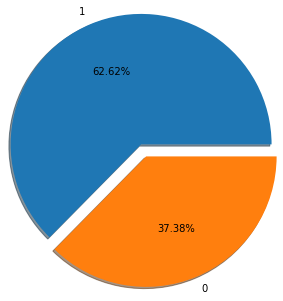

In [12]:
IsUnderRisk_counts = train['IsUnderRisk'].value_counts()
plt.pie(IsUnderRisk_counts, explode=[0.05, 0.1], labels=IsUnderRisk_counts.index, radius=1.5, autopct='%1.2f%%',  shadow=True)
plt.show()

In [13]:
X = train.drop('IsUnderRisk', axis = 'columns')
y = train['IsUnderRisk']

In [14]:
X.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,2,8.032,14,8,3,6,0
1,31,77.730,8,3,3,8,1
2,40,59.203,3,12,11,3,0
3,12,73.080,4,5,7,6,0
4,4,15.666,13,15,6,7,2


In [15]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: IsUnderRisk, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

In [18]:
clf = LogisticRegression()

In [19]:
clf.fit(X_train, y_train)

LogisticRegression()

In [20]:
clf.predict(X_test)

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [21]:
clf.score(X_test, y_test)

0.7981651376146789

# Creating a dense neural network

In [25]:
model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape = (7, )),
                             tf.keras.layers.Dense(3),
                             tf.keras.layers.Dropout(0.05),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006), loss='binary_crossentropy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 24        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
14/14 [==============================] - 1s 3ms/step - loss: 1.5377
Epoch 2/10
14/14 [==============================] - 0s 3ms/step - loss: 1.0447
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 0.8498
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 0.8079
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.7856
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6748
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6130
Epoch 8/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6092
Epoch 9/10
14/14 [==============================] - 0s 3ms/step - loss: 0.5437
Epoch 10/10
14/14 [==============================] - 0s 3ms/step - loss: 0.5703


In [27]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4360


0.43597695231437683

In [28]:
model.predict(X_test)

array([[0.20344475],
       [0.11571562],
       [0.77360195],
       [0.1599085 ],
       [0.82347107],
       [0.38866562],
       [0.03434685],
       [0.8949832 ],
       [0.11528745],
       [0.5780989 ],
       [0.4816286 ],
       [0.9489994 ],
       [0.44230843],
       [0.6814823 ],
       [0.7716362 ],
       [0.36427137],
       [0.23577741],
       [0.65023625],
       [0.65584296],
       [0.86181647],
       [0.8951349 ],
       [0.46487904],
       [0.73279893],
       [0.51371795],
       [0.9407742 ],
       [0.15237454],
       [0.06537294],
       [0.82797575],
       [0.48748246],
       [0.82836664],
       [0.117562  ],
       [0.92561734],
       [0.94580495],
       [0.20329371],
       [0.9506446 ],
       [0.6496624 ],
       [0.9334675 ],
       [0.06314602],
       [0.9650288 ],
       [0.9072199 ],
       [0.07941717],
       [0.9793775 ],
       [0.11481276],
       [0.8858422 ],
       [0.34370327],
       [0.94234955],
       [0.20694193],
       [0.818

# AUC-ROC Score

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9114583333333334

# One Hot Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
Y = np.array(y)
y_ = Y.reshape(-1,1)
y_

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [33]:
encoder = OneHotEncoder(sparse=False)
y2 = encoder.fit_transform(y_)
y2

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y2, test_size = 0.2)

# Creating a dense neural network

In [36]:
model_dnn = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape = (7, )),
                                 tf.keras.layers.Dense(3, ),
                                 tf.keras.layers.Dense(2, activation='softmax')])

model_dnn.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.006), loss = 'categorical_crossentropy')

model_dnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 24        
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_dnn.fit(X_test, y_test, epochs = 10)

Epoch 1/10
4/4 [==============================] - 2s 4ms/step - loss: 6.8845
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 4.4630
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 4.9983
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: 2.9521
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 5.1669
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 3.6194
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 2.4800
Epoch 8/10
4/4 [==============================] - 0s 8ms/step - loss: 2.2814
Epoch 9/10
4/4 [==============================] - 0s 18ms/step - loss: 2.2229
Epoch 10/10
4/4 [==============================] - 0s 8ms/step - loss: 1.3199


In [38]:
model_dnn.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 1.0173


1.0172884464263916

In [40]:
model_dnn_predict = model_dnn.predict(x_test)

# Log Loss Score

In [41]:
from sklearn.metrics import log_loss 
log_loss (y_test, model_dnn_predict)

1.0172883614624313